# <center> Cardiac Failure


In [60]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

In [62]:
excelFile = pd.ExcelFile(r"Cardiac_Outcomes.xlsx")
HosDis = pd.read_excel(excelFile, 'Hospitalization_Discharge')
CardiacComp = pd.read_excel(excelFile, 'CardiacComplications')
Respons = pd.read_excel(excelFile, 'Responsivenes')
PaHi = pd.read_excel(excelFile, 'PatientHistory')
Labs = pd.read_excel(excelFile, 'Labs')
Demog = pd.read_excel(excelFile, 'Demography')
PatPre = pd.read_excel(excelFile, 'Patient_Precriptions')


In [63]:
Demog_cleaned = pd.read_excel(r"C:\Users\srika\Kalyani\Data analytics\Data analytics\Data analytics\PYTHON\Demog_clean.xlsx")
#print(Demog_cleaned.head())
CardiacComp_cleaned = pd.read_excel(r"C:\Users\srika\Kalyani\Data analytics\Data analytics\Data analytics\PYTHON\CardiacComp_cleaned.xlsx")
#print(CardiacComp_cleaned.head(2))

### <center>Descriptive analysis of CardiacComplications


In [ ]:
Section 1: Patient Condition
    Heart Failure Type Distribution
Left / Right / Both

2️⃣ NYHA Class (Severity) periperal

I–II vs III–IV

3️⃣ LVEF Distribution / Missingness

#### Descriptive analysis of Cardiac complications

#### 1.Cardiac columns -Patient conditions

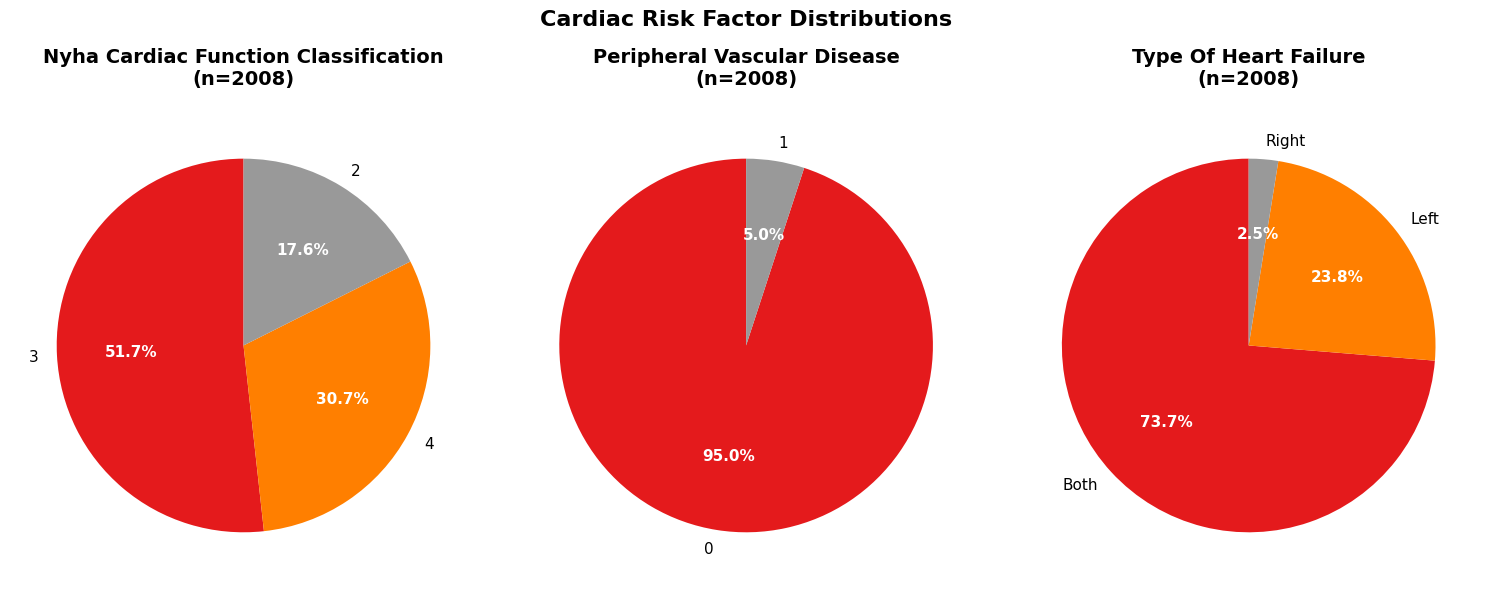

In [83]:
class CardiacPieCharts:
    def __init__(self, df):
        self.df = df
        self.cardiac_columns = [
            'NYHA_cardiac_function_classification',
            'peripheral_vascular_disease', 
            'type_of_heart_failure'
        ]
    
    def create_piecharts(self):
        """Create 1x3 pie charts for cardiac columns"""
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        for i, col in enumerate(self.cardiac_columns):
            ax = axes[i]
            
            # for value counts
            counts = self.df[col].value_counts()
            
            # pie chart
            wedges, texts, autotexts = ax.pie(counts.values, 
                                            labels=counts.index,
                                            autopct='%1.1f%%',
                                            startangle=90,
                                            colors=plt.cm.Set1(np.linspace(0, 1, len(counts))),
                                            textprops={'fontsize': 11})
            
            # Enhance readability
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
            
            ax.set_title(f'{col.replace("_", " ").title()}\n(n={len(self.df)})', 
                        fontsize=14, fontweight='bold',ha='center', pad=20)
            
        plt.subplots_adjust(top=0.22, wspace=0.4)
               
        plt.suptitle('Cardiac Risk Factor Distributions', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    def create_streamlit_piecharts(self):
        """Streamlit-ready version"""
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        for i, col in enumerate(self.cardiac_columns):
            ax = axes[i]
            counts = self.df[col].value_counts()
            
            wedges, texts, autotexts = ax.pie(counts.values, 
                                            labels=counts.index,
                                            autopct='%1.1f%%',
                                            startangle=90)
            
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
            
            ax.set_title(f'{col.replace("_", " ").title()}')
        
        plt.tight_layout()
        import streamlit as st
        st.pyplot(fig)

# Usage
viz = CardiacPieCharts(CardiacComp)
viz.create_piecharts()  
 

Based on above, 

*     31% of patients have higher NYHA.
*     93.2 had congestive heart failure.
*     74% had both heart failure.


LVEF categories patient count in dataset
LVEF_cat
Missing                 1413
Normal                   319
Mild dysfunction         152
Moderate dysfunction      94
Severe dysfunction        30
Name: count, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


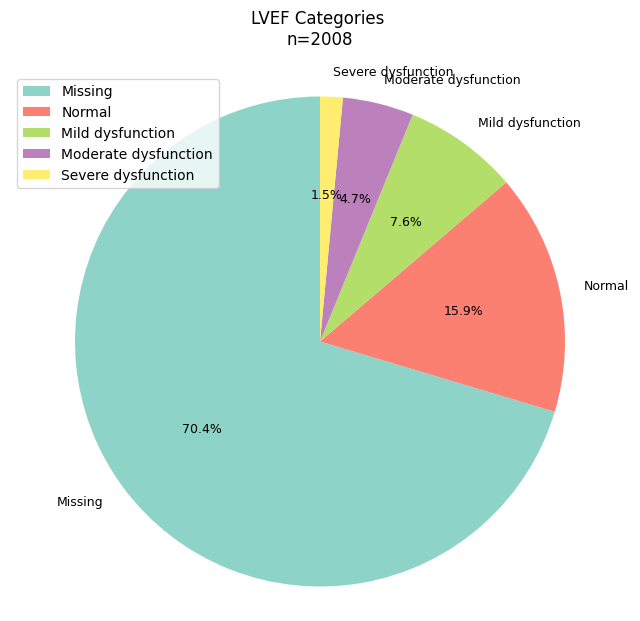

In [95]:
def categorize_lvef(x):
    if pd.isna(x): return 'Missing'
    elif 50 <= x <= 70: return 'Normal'
    elif 40 <= x < 50: return 'Mild dysfunction'
    elif 30 <= x < 40: return 'Moderate dysfunction'
    else: return 'Severe dysfunction'
CardiacComp_cleaned['LVEF_cat'] = CardiacComp_cleaned['LVEF'].apply(categorize_lvef)
print('LVEF categories patient count in dataset')
print(CardiacComp_cleaned['LVEF_cat'].value_counts())
print('^' * 45)

counts_clean = CardiacComp_cleaned['LVEF_cat'].value_counts()
# Clean pie chart
plt.figure(figsize=(8,7))
plt.pie(counts_clean.values, 
        labels=counts_clean.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3(np.linspace(0, 1, len(counts_clean))),
        textprops={'fontsize': 9})
plt.title('LVEF Categories \nn=2008', fontsize=12, pad=20)
plt.legend()
plt.axis('equal')  # Equal aspect ratio = perfect circle
plt.show()

####  LVEDD left_ventricular_end_diastolic_diameter_LV and ICU Admissions

Left_ventricular_end_diastolic_diameter_LV and Admission way
admission_ward              Cardiology  GeneralWard  ICU  Others
LVEDD_cat                                                       
Mild dilation                     72.2         12.3  0.6    14.8
Missing                           82.6          9.9  0.7     6.8
Moderate dilation                 79.2         10.4  0.0    10.4
Normal                            73.7         15.9  0.7     9.8
Severe dilation/very small        75.0         15.0  1.9     8.1


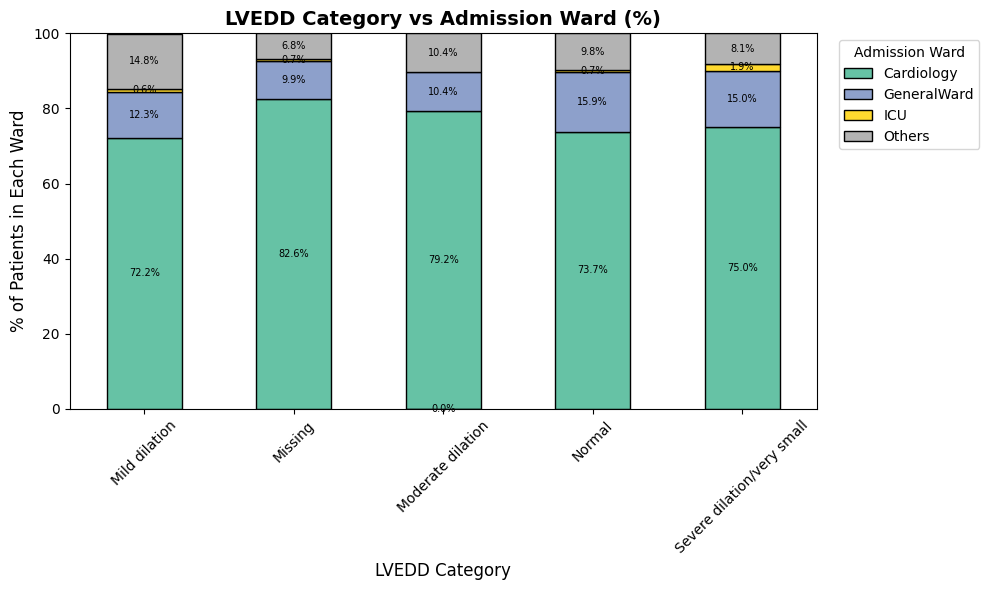

In [97]:
def categorize_lvedd(x):
    if pd.isna(x): return 'Missing'
    elif 39 <= x <= 59: return 'Normal'  # broad normal range
    elif 60 <= x <= 65: return 'Mild dilation'
    elif 66 <= x <= 70: return 'Moderate dilation'
    else: return 'Severe dilation/very small'

   
# crosstab each with admission_ward
LVEDD_adm_ward=(pd.crosstab(CardiacComp_cleaned['LVEDD_cat'], HosDis['admission_ward'], normalize='index')*100).round(1)
print('Left_ventricular_end_diastolic_diameter_LV and Admission way')
print(LVEDD_adm_ward)
ax = LVEDD_adm_ward.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set2',
    edgecolor='black'
)

ax.set_title('LVEDD Category vs Admission Ward (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('LVEDD Category', fontsize=12)
ax.set_ylabel('% of Patients in Each Ward', fontsize=12)
ax.legend(title='Admission Ward', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_ylim(0, 100)
ax.tick_params(axis='x', rotation=45)

# Optional: add % labels on bars
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center', fontsize=7)

plt.tight_layout()
plt.show()



Patients with LVEDD dilation show a higher proportion of ICU admissions compared to those with normal LVEDD. Even though absolute ICU counts are small, the percentage within the dilated LVEDD groups is higher, suggesting these patients present with more severe disease.”

**Insight :** Severe LV dilation patients had 2.4x higher ICU admission rates (1.9% vs 0.7% Normal)"


### Diagnostic analysis of Cardiac complications

#### NYHA class and Mortality

NYHA is a scale (Class I–IV) that describes how much heart failure limits a patient’s physical activity and symptoms.

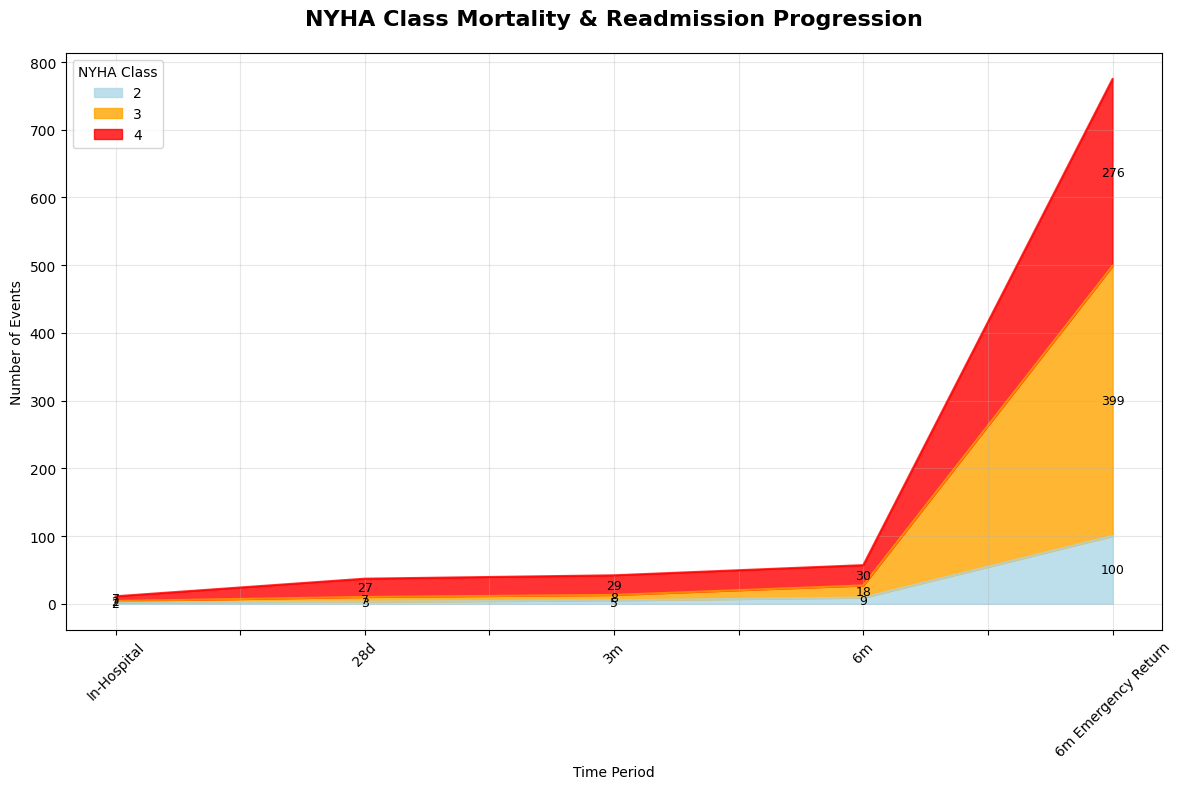

In [103]:
NYHA_Hospital_mortality=pd.crosstab(CardiacComp_cleaned['NYHA_cardiac_function_classification'],HosDis['outcome_during_hospitalization'])
NYHA_28d_mortality=pd.crosstab(CardiacComp_cleaned['NYHA_cardiac_function_classification'],HosDis['death_within_28_days'])
NYHA_3m_mortality=pd.crosstab(CardiacComp_cleaned['NYHA_cardiac_function_classification'],HosDis['death_within_3_months'])
NYHA_6m_mortality=pd.crosstab(CardiacComp_cleaned['NYHA_cardiac_function_classification'],HosDis['death_within_6_months'])
NYHA_emergencyreturn_6m=pd.crosstab(CardiacComp_cleaned['NYHA_cardiac_function_classification'],HosDis['return_to_emergency_department_within_6_months'])


# Combine all crosstabs into one DataFrame
timepoints = ['In-Hospital', '28d', '3m', '6m', '6m Emergency Return']
nyha_classes = ['2', '3', '4']  # Assuming your NYHA levels

# Stack mortality counts (adjust column indices based on your crosstabs)
mortality_data = pd.DataFrame({
    nyha_classes[0]: [NYHA_Hospital_mortality.iloc[0,1], NYHA_28d_mortality.iloc[0,1], 
                      NYHA_3m_mortality.iloc[0,1], NYHA_6m_mortality.iloc[0,1], 
                      NYHA_emergencyreturn_6m.iloc[0,1]],
    
    nyha_classes[1]: [NYHA_Hospital_mortality.iloc[1,1], NYHA_28d_mortality.iloc[1,1], 
                      NYHA_3m_mortality.iloc[1,1], NYHA_6m_mortality.iloc[1,1], 
                      NYHA_emergencyreturn_6m.iloc[1,1]],
    
    nyha_classes[2]: [NYHA_Hospital_mortality.iloc[2,1], NYHA_28d_mortality.iloc[2,1], 
                      NYHA_3m_mortality.iloc[2,1], NYHA_6m_mortality.iloc[2,1], 
                      NYHA_emergencyreturn_6m.iloc[2,1]]
}, index=timepoints)

# Plot stacked area chart
mortality_data.plot(kind='area', stacked=True, figsize=(12, 8),
                   color=['lightblue', 'orange', 'red'], alpha=0.8)

plt.title('NYHA Class Mortality & Readmission Progression', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Number of Events')
plt.xlabel('Time Period')
plt.legend(title='NYHA Class', loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels
for i, (_, row) in enumerate(mortality_data.iterrows()):
    for j, val in enumerate(row):
        plt.text(i, sum(row[:j+1])-val/2, f'{int(val)}', 
                ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()


**Higher NYHA class (especially Class 4) represents more advanced heart failure, and in this cohort:**

The proportion of emergency admissions is similar across NYHA 2–4, with only a mild increase in Class 4.

NYHA class 3 and 4 have highest cardiology and significant ICU admissions

Most in‑hospital deaths occur in NYHA Class 4, supporting its role as the highest‑risk group, although absolute mortality is low.

It can been observed
* The mortality is increasing during hospitalization for 4th Killip grade
* Death within months is also high among the 3,4th Killip grade
* 60+ year old patients have to be monitored carefully as, 3rd and 4th Killpi grades are prevalent in those section.

#### congestive_heart_failure and Death within 6m; 6 m mortality wrt CHF

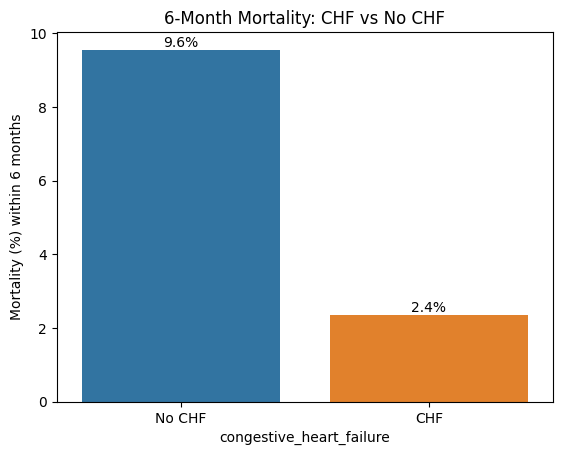

In [40]:
mortality_chf = (
    NYHA_adm_outcome.groupby("congestive_heart_failure")["death_within_6_months"]
    .mean()
    .reset_index()
)

# Convert to percentage
mortality_chf["death_within_6_months"] = mortality_chf["death_within_6_months"] * 100

# Plot
ax = sns.barplot(data=mortality_chf, 
                 x="congestive_heart_failure", 
                 y="death_within_6_months")

# Set labels
ax.set_xticklabels(["No CHF", "CHF"])
ax.set_ylabel("Mortality (%) within 6 months")
ax.set_title("6-Month Mortality: CHF vs No CHF")

# Add text labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


In this cohort, patients with congestive heart failure had slightly higher mortality after discharge compared to patients without CHF (2.35% vs 9.56% in our dataset). Although the increase is modest, it indicates that CHF patients require careful follow-up and monitoring to reduce post-discharge risk.

### <center>3.Complication Burden

myocardial_infarction,congestive_heart_failure,peripheral_vascular_disease are considered as complicated columns and give a score of 1 when patients had them



In [104]:
# COMPLICATION BURDEN
comp_cols = ['myocardial_infarction', 'congestive_heart_failure', 'peripheral_vascular_disease']

# COUNT COMPLICATIONS PER PATIENT
CardiacComp_cleaned['comp_burden'] = CardiacComp_cleaned[comp_cols].sum(axis=1)

# RESULTS (Screenshot this)
print("COMPLICATION BURDEN:")
print(CardiacComp_cleaned['comp_burden'].value_counts().sort_index())
print(f"High burden (2-3): {(CardiacComp_cleaned['comp_burden']>=2).mean()*100:.1f}%")
print(f"Average: {CardiacComp_cleaned['comp_burden'].mean():.1f}")
print("\nTop complications:")
print(CardiacComp_cleaned[comp_cols].sum().sort_values(ascending=False))


COMPLICATION BURDEN:
comp_burden
0     126
1    1658
2     214
3      10
Name: count, dtype: int64
High burden (2-3): 11.2%
Average: 1.1

Top complications:
congestive_heart_failure       1872
myocardial_infarction           143
peripheral_vascular_disease     101
dtype: int64


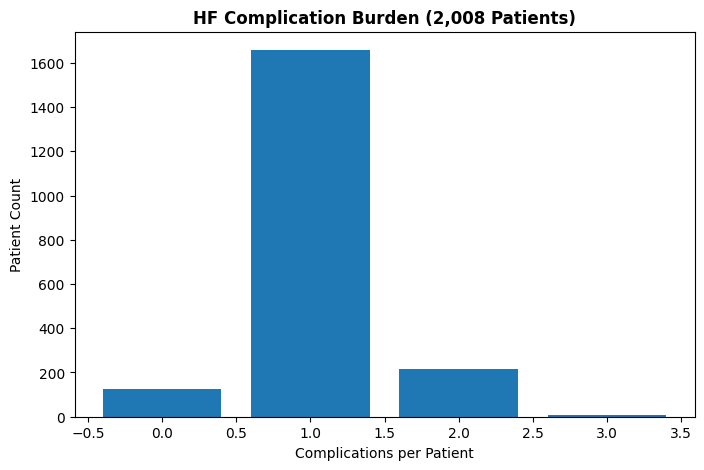

In [105]:
plt.figure(figsize=(8,5))
plt.bar(CardiacComp_cleaned['comp_burden'].value_counts().sort_index().index, 
        CardiacComp_cleaned['comp_burden'].value_counts().sort_index().values)
plt.title("HF Complication Burden (2,008 Patients)", fontweight='bold')
plt.xlabel("Complications per Patient")
plt.ylabel("Patient Count")
plt.show()


In [106]:
# High burden = 2 or more complications
CardiacComp_cleaned['high_burden'] = CardiacComp_cleaned['comp_burden'] >= 2
comp_outcome = CardiacComp_cleaned.merge(
    HosDis[['inpatient_number',
            'outcome_during_hospitalization',
            'death_within_28_days',
            'death_within_3_months',
            'death_within_6_months']],
    on='inpatient_number',
    how='left'
)

# Inpatient death
ct_inpat = pd.crosstab(
    comp_outcome['comp_burden'],
    comp_outcome['outcome_during_hospitalization'],
    normalize='index'
) * 100

# 28-day, 3-month, 6-month death
ct_28d = pd.crosstab(
    comp_outcome['comp_burden'],
    comp_outcome['death_within_28_days'],
    normalize='index'
) * 100

ct_3m = pd.crosstab(
    comp_outcome['comp_burden'],
    comp_outcome['death_within_3_months'],
    normalize='index'
) * 100

ct_6m = pd.crosstab(
    comp_outcome['comp_burden'],
    comp_outcome['death_within_6_months'],
    normalize='index'
) * 100

print("Inpatient death (%) by complication burden:")
print(ct_inpat.round(1))
print("\n28-day death (%) by complication burden:")
print(ct_28d.round(1))
print("\n3-month death (%) by complication burden:")
print(ct_3m.round(1))
print("\n6-month death (%) by complication burden:")
print(ct_6m.round(1))



Inpatient death (%) by complication burden:
outcome_during_hospitalization  Alive  Dead  DischargeAgainstOrder
comp_burden                                                       
0                                99.2   0.8                    0.0
1                                94.4   0.5                    5.1
2                                89.3   0.9                    9.8
3                                90.0   0.0                   10.0

28-day death (%) by complication burden:
death_within_28_days      0    1
comp_burden                     
0                      96.8  3.2
1                      98.3  1.7
2                      97.7  2.3
3                     100.0  0.0

3-month death (%) by complication burden:
death_within_3_months      0    1
comp_burden                      
0                       95.2  4.8
1                       98.1  1.9
2                       97.7  2.3
3                      100.0  0.0

6-month death (%) by complication burden:
death_within_6_months   

In [107]:
comp_merged = CardiacComp_cleaned.merge(
    HosDis[['inpatient_number',
            're_admission_within_28_days',
            're_admission_within_3_months',
            're_admission_within_6_months',
            'death_within_28_days',
            'death_within_3_months',
            'death_within_6_months', 'admission_ward',
            'admission_way',
            'outcome_during_hospitalization']],
    on='inpatient_number',
    how='left'
)
for col in ['re_admission_within_28_days',
            're_admission_within_3_months',
            're_admission_within_6_months']:
    print(f"\n{col} by comp_burden (% within burden):")
    print(
        pd.crosstab(
            comp_merged['comp_burden'],
            comp_merged[col],
            normalize='index'
        ).mul(100).round(1)
    )



re_admission_within_28_days by comp_burden (% within burden):
re_admission_within_28_days      0     1
comp_burden                             
0                             88.9  11.1
1                             93.4   6.6
2                             92.1   7.9
3                            100.0   0.0

re_admission_within_3_months by comp_burden (% within burden):
re_admission_within_3_months     0     1
comp_burden                             
0                             71.4  28.6
1                             75.5  24.5
2                             75.7  24.3
3                             70.0  30.0

re_admission_within_6_months by comp_burden (% within burden):
re_admission_within_6_months     0     1
comp_burden                             
0                             57.9  42.1
1                             61.5  38.5
2                             64.0  36.0
3                             50.0  50.0


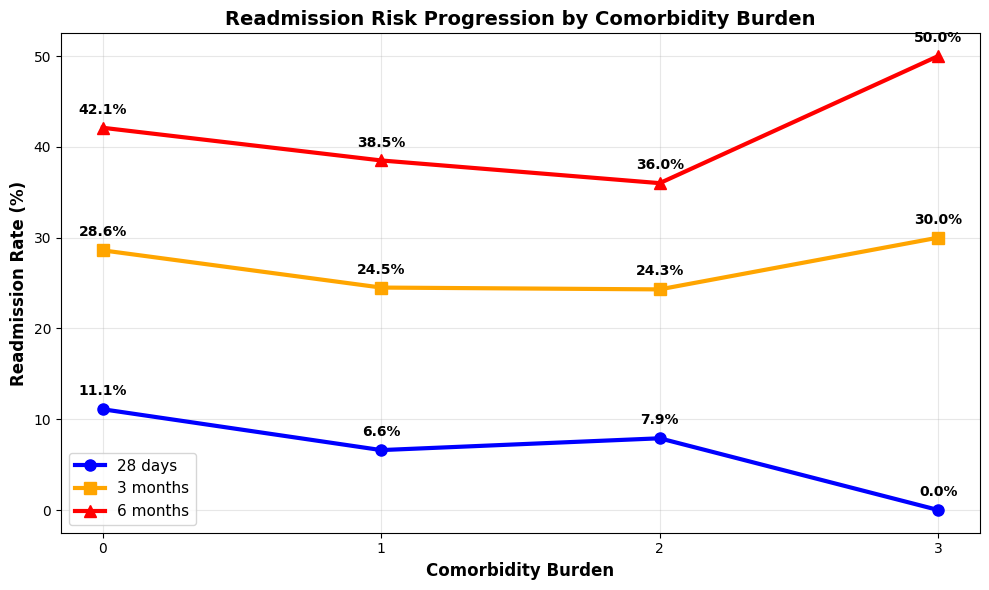

In [108]:
# Data from crosstabs for easy readability
burden_levels = ['0', '1', '2', '3']
time_28d = [11.1, 6.6, 7.9, 0.0]
time_3m = [28.6, 24.5, 24.3, 30.0]
time_6m = [42.1, 38.5, 36.0, 50.0]

x = np.arange(len(burden_levels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines for each time period
ax.plot(x, time_28d, 'o-', linewidth=3, markersize=8, label='28 days', color='blue')
ax.plot(x, time_3m, 's-', linewidth=3, markersize=8, label='3 months', color='orange') 
ax.plot(x, time_6m, '^-', linewidth=3, markersize=8, label='6 months', color='red')

# Customize
ax.set_xlabel('Comorbidity Burden', fontsize=12, fontweight='bold')
ax.set_ylabel('Readmission Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Readmission Risk Progression by Comorbidity Burden', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(burden_levels)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)

# Add value labels on points
for i, burden in enumerate(burden_levels):
    ax.annotate(f'{time_28d[i]}%', (i, time_28d[i]), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
    ax.annotate(f'{time_3m[i]}%', (i, time_3m[i]), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
    ax.annotate(f'{time_6m[i]}%', (i, time_6m[i]), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


**Insights:** Patients with highest complication burden (3 conditions) show no excess mortality but markedly higher 6-month readmission (50% vs 36-42% for lower burdens), indicating they represent a chronic management challenge rather than acute lethal risk.

"**Comorbidity burden 3 reaches 50% readmission at 6 months** - highest risk trajectory"


In [51]:
# NYHA vs Killip crosstab
crosstab = (pd.crosstab( CardiacComp_cleaned['NYHA_cardiac_function_classification'], 
                        CardiacComp_cleaned['Killip_grade'], normalize='index')*100).round(1)
print(crosstab)
#plt.figure(figsize=(8,6))
fig = px.imshow(crosstab, text_auto=True)
fig.show()

Killip_grade                             1     2     3    4
NYHA_cardiac_function_classification                       
2                                     38.5  42.8  18.7  0.0
3                                     29.3  52.3  18.3  0.2
4                                     14.1  54.4  22.1  9.4


**Insight:** NYHA IV + Killip IV = 64% of 11 deaths → Severity scoring validated, NYHA 4 + Killip ≥3 = 31.5% of cohort, **highest risk group**

In [109]:
# Saving to a new Excel file
CardiacComp_cleaned.to_excel("CardiacComp_cleaned.xlsx", index=False)